# <center>Final Project</center>

## Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [8]:
#Read in the only columns household_key, BASKET_ID, DAY, 
#PRODUCT_ID, QUANTITY, and SALES_VALUE.

cols =["household_key","BASKET_ID","DAY","PRODUCT_ID","QUANTITY","SALES_VALUE"]


#Convert DAY, QUANTITY, and PRODUCT_ID to the smallest appropriate integer 
#types

dtypes = {"DAY":"Int16","QUANTITY":"Int32","PRODUCT_ID":"Int32"}

transactions = pd.read_csv("project data/project_transactions.csv",
                          dtype =dtypes,
                          usecols =cols)

In [12]:
transactions.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [11]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,-861.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [13]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of sales 2016 vs the 2017 sales.
* Then, plot total sales by day of week.

In [20]:
#create a date column and then drop day column

transactions = (transactions.assign(date = (pd.to_datetime("2016",format ='%Y')+
    pd.to_timedelta(transactions["DAY"].sub(1).astype(str)+"days"))))

In [22]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,1,842930,1,2.19,2016-01-01
1,1364,26984896261,1,897044,1,2.99,2016-01-01
2,1364,26984896261,1,920955,1,3.09,2016-01-01
3,1364,26984896261,1,937406,1,2.50,2016-01-01
4,1364,26984896261,1,981760,1,0.60,2016-01-01


In [25]:
transactions.tail()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,date
2146306,1598,42305362535,711,92130,1,0.99,2017-12-11
2146307,1598,42305362535,711,114102,1,8.89,2017-12-11
2146308,1598,42305362535,711,133449,1,6.99,2017-12-11
2146309,1598,42305362535,711,6923644,1,4.50,2017-12-11
2146310,1598,42305362535,711,14055192,1,6.99,2017-12-11


<Axes: xlabel='date'>

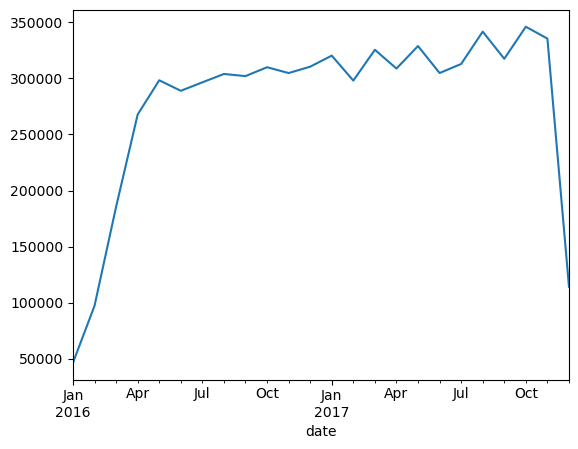

In [32]:
#for a time based analysis,set the date index
#plot the seum of sales by month


(transactions.set_index("date").
 loc[:,"SALES_VALUE"].resample("M").sum().plot())

<Axes: xlabel='date'>

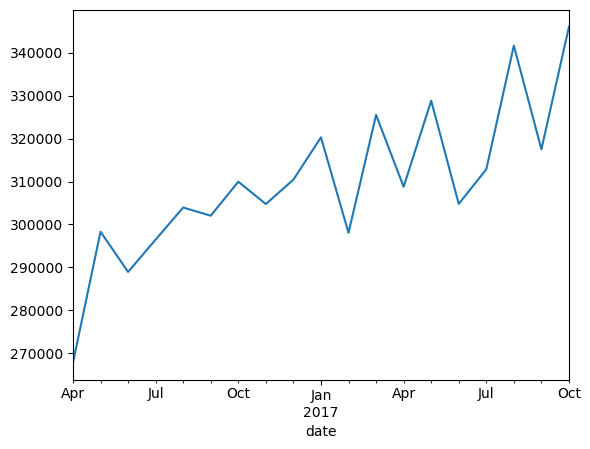

In [33]:
# Filter above plot to specified date range with row slice in .loc
(transactions.set_index("date").
 loc["2016-04":"2017-10","SALES_VALUE"].resample("M")
.sum().plot())

<Axes: xlabel='date'>

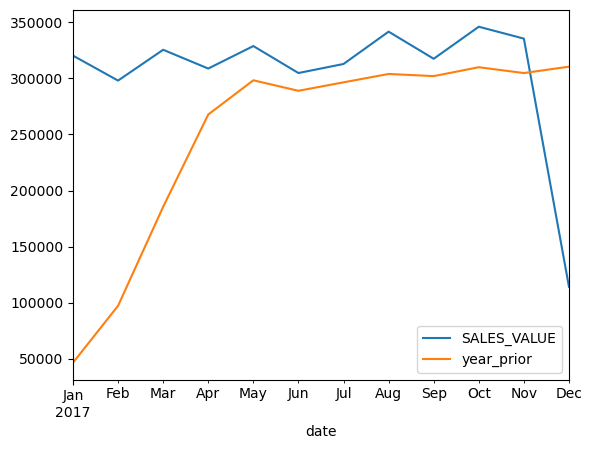

In [42]:
# After resampling monthly sales, create a year_prior column with assign
# This column is our monthly sales shifted forward a year (12 rows/months)

(transactions.set_index("date").loc[:,["SALES_VALUE"]]
.resample("M").sum()
.assign(year_prior = lambda x :x["SALES_VALUE"].shift(12)).loc["2017"].plot()
)

<Axes: xlabel='date'>

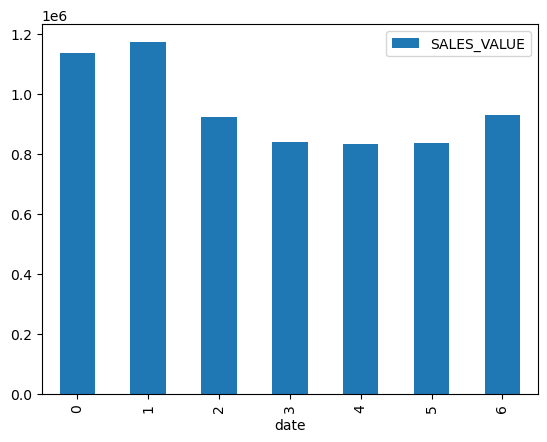

In [48]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart
(transactions.groupby(transactions["date"].dt.dayofweek).
 agg({"SALES_VALUE":"sum"}).
 plot.bar()
)

##  DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc.


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [51]:
dem_cols = ["AGE_DESC","INCOME_DESC","household_key","HH_COMP_DESC"]

dem_dtypes = {"AGE_DESC":"category","INCOME_DESC":"category","HH_COMP_DESC":"category"}

demographics = pd.read_csv("project data/hh_demographic.csv",
                           usecols =dem_cols,
                          dtype=dem_dtypes)

In [52]:
demographics.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [53]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [55]:
# Create total sales by household dataframe

household_sales = (transactions.groupby("household_key").
                  agg({"SALES_VALUE":"sum"}))


In [56]:
household_sales.head()

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06


In [57]:
## Join household sales and demographics table on 
## household_key (inner since we're interested in both sets)

demo_household = (household_sales .merge(demographics,
                                       how="inner",
                                       left_on= "household_key",
                                       right_on ="household_key"))


In [59]:
demo_household .info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 19.8 KB


In [58]:
demo_household

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


<Axes: xlabel='AGE_DESC'>

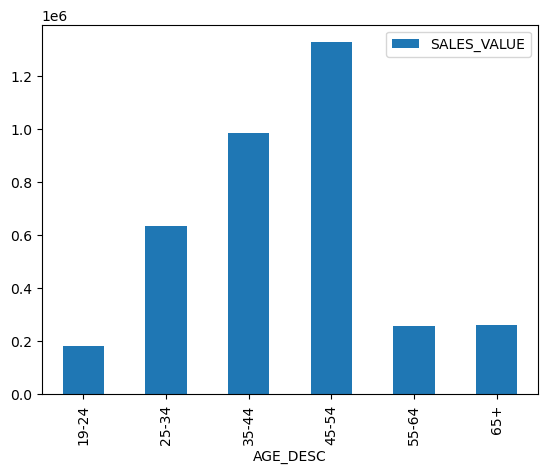

In [61]:
# Calculate sum of sales by age group

(demo_household.groupby(["AGE_DESC"]).
 agg({"SALES_VALUE":"sum"}).plot.bar())

<Axes: xlabel='INCOME_DESC'>

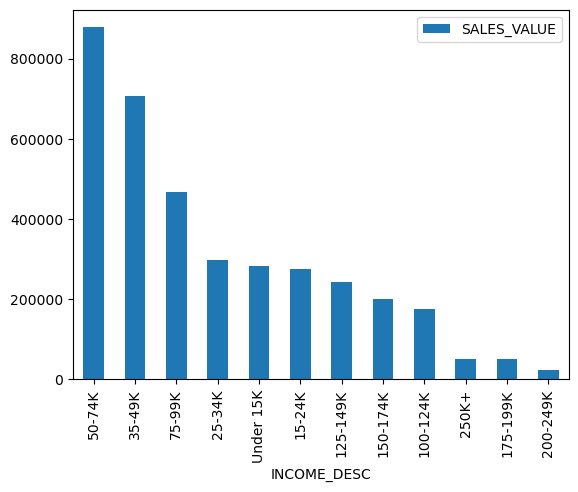

In [64]:
# Calculate sum of sales by income, ordered by magnitude

(demo_household.groupby(["INCOME_DESC"]).
agg({"SALES_VALUE":"sum"}).
 sort_values("SALES_VALUE",ascending=False).plot.bar())

In [65]:
# Calculate mean household spend by Age Description and HH Composition
# Format with a heatmap across all cells

(demo_household .pivot_table(index="AGE_DESC",
            columns ="HH_COMP_DESC",
            values ="SALES_VALUE",aggfunc="mean",margins =True))

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [66]:
(demo_household .pivot_table(index="AGE_DESC",
            columns ="HH_COMP_DESC",
            values ="SALES_VALUE",aggfunc="mean",margins =True).
style.background_gradient(cmap="RdYlGn",axis =None))

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


##  PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [67]:
product_cols = ["PRODUCT_ID","DEPARTMENT"]

product_dtypes ={"PRODUCT_ID":"Int32","DEPARTMENT":"category"}

product =pd.read_csv("project data/product.csv",
                     usecols =product_cols,
                    dtype =product_dtypes)

In [69]:
product.dtypes

PRODUCT_ID       Int32
DEPARTMENT    category
dtype: object

In [71]:

transactions.head(3)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,1,842930,1,2.19,2016-01-01
1,1364,26984896261,1,897044,1,2.99,2016-01-01
2,1364,26984896261,1,920955,1,3.09,2016-01-01


In [72]:
demographics .head(3)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8


In [73]:
product.head(3)

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY


In [74]:
# Join all three tables together with an inner join
#transaction and demographics by household_key 
#transacation and product by product_id
# Join product on product_id (only shared column)



trans_demo_product = (transactions.merge(demographics,
                                        how="inner",
                                        left_on ="household_key",
                                        right_on ="household_key")
                     .merge(product,how ="inner",
                           left_on ="PRODUCT_ID",right_on ="PRODUCT_ID"))

In [77]:
trans_demo_product.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   DAY            1161575 non-null  Int16         
 3   PRODUCT_ID     1161575 non-null  Int32         
 4   QUANTITY       1161575 non-null  Int32         
 5   SALES_VALUE    1161575 non-null  float64       
 6   date           1161575 non-null  datetime64[ns]
 7   AGE_DESC       1161575 non-null  category      
 8   INCOME_DESC    1161575 non-null  category      
 9   HH_COMP_DESC   1161575 non-null  category      
 10  DEPARTMENT     1161575 non-null  category      
dtypes: Int16(1), Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 63.1 MB


In [81]:
# Where does our youngest demographic rank near the top in sales?


demo_category_df = (trans_demo_product .pivot_table(index ="DEPARTMENT",
                               columns ="AGE_DESC",values ="SALES_VALUE",
                               aggfunc="sum").
 style.background_gradient(cmap ="RdYlGn",axis=1))


In [82]:
demo_category_df

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name

In [83]:
demo_category_df.to_excel("demographics_category_sales.xlsx",
                          sheet_name ="sales_pivot")